# Ujian Akhir Semester Data Mining & Warehouse

#### Nama  : Farah Balqist
#### NIM : 2007339
#### Kelas : Ilmu Komputer C2
#### Tanggal : 3 Januari 2023 

## Dataset 
link dataset : https://drive.google.com/file/d/1vv7YjmjVYdlYrm5tmsLbckNQNXi5afMn/view?usp=share_link

dalam task ini memakai dataset melek_huruf_diatas15.csv karena salah satu dimensi PMI yaitu adalah pengetahuan dan standar hidup layak yang memiliki keterhubungan dengan melek huruf

PMI dapat dihitung dengan data harapan hidup, rata-rata lama sekolah, dan pengeluaran per kapita.

Kategori PMI :

<60 : sangat rendah
60 < pmi < 70 : sedang
70 < pmi < 80 : rendah
>80 : sangat tinggi

Tugasnya adalah memprediksi tingkat PMI per provinsi

Lakukan EDA, Praproses, dan buat model untuk memprediksi kategori_pmi (ada di pmi.csv)

## Load Dataset

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load file csv

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\datmin python\\uas\\melek_huruf_diatas15.csv")

In [3]:
# tampilkan baris 5 pertama
df.head(5)

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18
4,JAMBI,2022,98.1


In [4]:
#menampilkan data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prov                  315 non-null    object
 1   tahun                 315 non-null    int64 
 2   melek_huruf_diatas15  315 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.5+ KB


In [5]:
#melihat jumlah data yang memiliki nilai null
df.isnull().sum()

prov                    0
tahun                   0
melek_huruf_diatas15    0
dtype: int64

## Cek apakah ada kolom yang isinya tidak sesuai

Di dalam data melek_huruf_diatas15.csv terdapat kolom melek_diatas15 yang salah satu isi datanya bervalue "-". Sehingga perlu diisi dengan nilai modus

In [6]:
# buat variabel baru untuk menyimpan hasil kolom yang memiliki nilai "-"
kolom_melek_huruf_diatas15 = df[df['melek_huruf_diatas15'] == '-']

#tampilkan kolom yang mempunyai nilai '-'
kolom_melek_huruf_diatas15

,prov,tahun,melek_huruf_diatas15
303,KALIMANTAN UTARA,2014,-


Dapat dilihat bahwa kolom yang mengandung value '-' adalah provinsi Kalimantan Utara

## membuat variabel baru untuk menyimpan nilai modus

In [7]:
modus_melek_huruf_diatas15 = df['melek_huruf_diatas15'].mode()

#menampilkan nilai modus
print(modus_melek_huruf_diatas15)

0    98.75
Name: melek_huruf_diatas15, dtype: object


## ganti value '-' dengan nilai modus

In [8]:
df.melek_huruf_diatas15 = df.melek_huruf_diatas15.str.replace('-', '98.75')

In [9]:
#menampilkan isi kolom yang sudah diganti
df.head(305)

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18
4,JAMBI,2022,98.1
...,...,...,...
300,KALIMANTAN TENGAH,2014,98.82
301,KALIMANTAN SELATAN,2014,98.19
302,KALIMANTAN TIMUR,2014,98.59
303,KALIMANTAN UTARA,2014,98.75


Dapat dilihat bahwa presentase melek_huruf_diatas15 provinsi Kalimantan Utara pada tahun 2014 nilai '-' sudah diganti dengan nilai modusnya yaitu 98.75

## Exploratory Data Analysis

melihat tahun yang paling banyak melek huruf diatas 15

<AxesSubplot:xlabel='tahun', ylabel='count'>

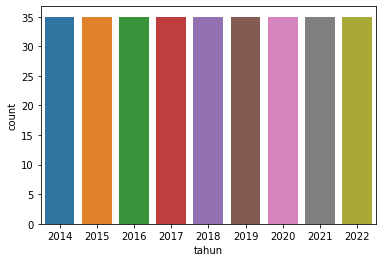

In [10]:
sns.countplot(x="tahun", data=df)

setelah di plot, dapat dilihat bahwa jumlah tahun yang melek huruf adalah sama rata, hal ini mengindikasikan bahwa dari tahun 2014-2022 tidak mengalami penurunan 

#### melihat 5 provinsi teratas yang memiliki jumlah melek huruf tertinggi

Text(0.5, 1.0, 'Top 5 Provinsi')

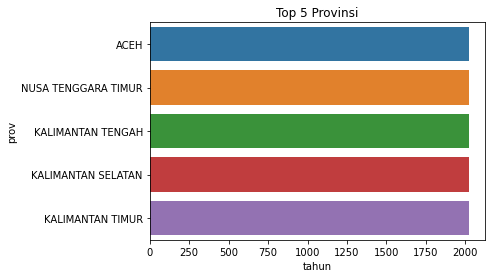

In [11]:
high_prov = df.sort_values(by="tahun", ascending=False).head(5) 
sns.barplot(x='tahun', y='prov', data = high_prov).set_title('Top 5 Provinsi')

dapat dilihat bahwa jumlah melek huruf sama setiap provinsi, sehingga tidak ada provinsi teratas yang memiliki jumlah melek huruf tertinggi

#### Melihat jumlah presentase melek_huruf_diatas15

<AxesSubplot:xlabel='melek_huruf_diatas15', ylabel='Count'>

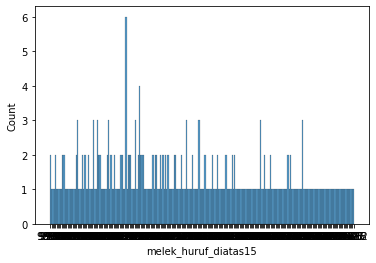

In [12]:
sns.histplot(data=df, x="melek_huruf_diatas15")

Dari histogram diatas dapat dilihat bahwa jumlah tertinggi presentase melek_huruf diatas15 adalah 6

## Persiapan Dataset

In [13]:
#import library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [14]:
#ambil kolom melek_huruf_diatas15 kemudian simpan di Y
Y = (df.melek_huruf_diatas15)

In [15]:
Y.head()

0    98.25
1    99.11
2    99.29
3    99.18
4     98.1
Name: melek_huruf_diatas15, dtype: object

In [16]:
# drop kolom prov kemudian simpan di X
X = df.drop("prov", axis=1) # axis = 1 (kolom)

In [17]:
# menampilkan 5 teratas
X.head()

,tahun,melek_huruf_diatas15
0,2022,98.25
1,2022,99.11
2,2022,99.29
3,2022,99.18
4,2022,98.1


## Split Dataset

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [19]:
# tampilkan X_train
X_train

,tahun,melek_huruf_diatas15
206,2017,98.68
239,2016,92.75
53,2021,93.85
22,2022,98.97
265,2015,98.88
...,...,...
106,2019,99.15
83,2020,95.09
17,2022,88.97
230,2016,98.97


In [20]:
# tampilkan X_test
X_test

,tahun,melek_huruf_diatas15
42,2021,97.28
11,2022,98.49
94,2020,99.79
114,2019,99.0
266,2015,98.21
...,...,...
75,2020,98.75
306,2014,91.26
30,2022,99.4
19,2022,93.96


In [21]:
# tampilkan Y_train
Y_train

206    98.68
239    92.75
53     93.85
22     98.97
265    98.88
       ...  
106    99.15
83     95.09
17     88.97
230    98.97
98     98.75
Name: melek_huruf_diatas15, Length: 252, dtype: object

In [22]:
# tampilkan Y_test
Y_test

42     97.28
11     98.49
94     99.79
114     99.0
266    98.21
       ...  
75     98.75
306    91.26
30      99.4
19     93.96
79      99.0
Name: melek_huruf_diatas15, Length: 63, dtype: object

In [23]:
# menyimpan kolom untuk keperluan prediksi
import pickle
with open('C:\\Users\\Lenovo\\datmin python\\uas\\melek_huruf_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

## Pembuatan Model

### Random Forest

In [24]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.031746031746031744
              precision    recall  f1-score   support

       81.19       0.00      0.00      0.00         1
       88.97       0.00      0.00      0.00         0
       91.18       0.00      0.00      0.00         0
       91.26       0.00      0.00      0.00         1
       92.27       0.00      0.00      0.00         0
        92.3       0.00      0.00      0.00         1
       92.48       0.00      0.00      0.00         0
       92.58       0.00      0.00      0.00         1
       92.79       0.00      0.00      0.00         1
       92.85       0.00      0.00      0.00         0
        92.9       0.00      0.00      0.00         1
       93.09       0.00      0.00      0.00         0
       93.31       0.00      0.00      0.00         1
       93.32       0.00      0.00      0.00         0
       93.41       0.00      0.00      0.00         1
       93.54       0.00      0.00      0.00         1
       93.59       0.00      0.00      0.00         

D:\apps\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\apps\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\apps\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\apps\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefin

Dapat dilihat bahwa akurasinya buruk

### XGBOOST

In [26]:
#import library
import xgboost as xgb

D:\apps\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
